In [1]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
from portfolio_evaluation import get_portfolio_returns
from os import path
from portfolio_evaluation import *

import matplotlib.pyplot as plt

# Results Showroom

* results for individual datasets

In [2]:
results_dir = '../data/results/'

# Monthly Datasets 

## 6 portfolios

In [3]:
methods = ['q005'] + \
        [f'q0{i}' for i in range(1,10)] + \
        ['q095','q099'] # 'q001'
dataset =  '6_Portfolios_2x3' # 
#dataset =  '17_Industry_Portfolios'
#dataset = '25_Portfolios_5x5'
#dataset = '48_Industry_Portfolios'
#dataset =  '100_Portfolios_10x10'

In [4]:
path_to_results = f"{results_dir}{dataset}/{dataset}_results.pickle"
if path.exists(path_to_results):
    results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_results.pickle")
else:
    results = get_results(dataset,methods)

In [5]:
results.keys()

dict_keys(['returns', 'returns_stats', 'weights_stats', 'forecasting_errors'])

In [6]:
q_criteria = ['5%', '10%','20%','30%', '40%', '50%','60%', '70%', '80%', '90%', '95%', '99%']
q_based = results['returns_stats'].loc[q_criteria]

In [7]:
q_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
5%,-6.273,-6.37,-6.124,-6.496,-6.63,-7.709,-7.467,-8.695,-9.364,-9.667,-9.541,-9.688
10%,-4.028,-3.92,-4.142,-4.099,-4.073,-5.289,-5.345,-6.291,-7.158,-7.274,-7.378,-7.371
20%,-1.715,-1.738,-1.823,-1.965,-2.023,-2.782,-2.935,-3.222,-3.419,-3.932,-3.818,-3.288
30%,-0.454,-0.286,-0.507,-0.296,-0.672,-1.018,-1.246,-1.53,-1.246,-1.774,-1.741,-1.265
40%,0.671,0.679,0.668,0.848,0.553,0.311,0.203,0.337,0.266,0.322,0.173,0.309
50%,1.598,1.713,1.679,1.676,1.702,1.608,1.697,1.403,1.589,1.424,1.305,1.413
60%,2.474,2.567,2.465,2.598,2.55,2.711,2.716,2.678,2.762,2.688,2.545,2.649
70%,3.328,3.511,3.484,3.571,3.682,3.863,3.801,3.866,3.956,4.308,4.012,3.903
80%,4.275,4.562,4.548,4.716,4.638,5.155,4.807,5.31,5.636,6.074,5.688,5.485
90%,6.093,6.335,6.425,6.338,6.693,6.908,7.22,7.891,8.115,8.261,8.195,8.085


In [8]:
risk_criteria =  ['std', 'min','max','vol p.a.', 'skew', 'kurt','MDD', 'CVaR 99%']
risk_based = results['returns_stats'].loc[risk_criteria]

In [9]:
risk_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,4.403,4.474,4.481,4.673,4.769,5.212,5.358,5.899,6.262,6.522,6.431,6.426
min,-20.2,-22.64,-25.9,-22.51,-23.84,-27.98,-26.81,-23.0,-29.38,-32.37,-32.37,-32.37
max,12.32,15.2,15.76,14.55,14.4,15.21,16.45,20.74,27.09,27.09,27.09,27.09
vol p.a.,15.25,15.5,15.52,16.19,16.52,18.05,18.56,20.43,21.69,22.59,22.28,22.26
skew,-1.039,-0.99,-1.06,-1.051,-0.961,-0.951,-0.692,-0.565,-0.512,-0.579,-0.618,-0.665
kurt,3.061,3.718,3.998,3.415,3.121,2.753,2.51,1.757,2.18,2.155,2.749,2.933
MDD,-57.62,-52.91,-43.42,-56.88,-56.45,-57.78,-53.84,-60.86,-63.17,-57.42,-63.9,-63.9
CVaR 99%,-10.66,-10.35,-10.23,-11.14,-11.22,-12.5,-11.89,-13.17,-13.92,-14.56,-14.32,-14.54


In [10]:
reward_criteria =  ['mean','CAGR','Sharpe']
reward_based = results['returns_stats'].loc[reward_criteria]

In [11]:
reward_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
mean,1.148,1.283,1.195,1.237,1.185,1.03,1.075,0.998,1.057,1.008,0.858,0.928
CAGR,13.34,15.13,13.93,14.37,13.61,11.23,11.74,10.3,10.79,9.904,8.03,8.933
Sharpe,0.62,0.714,0.645,0.65,0.599,0.444,0.461,0.374,0.385,0.343,0.268,0.306


<AxesSubplot:>

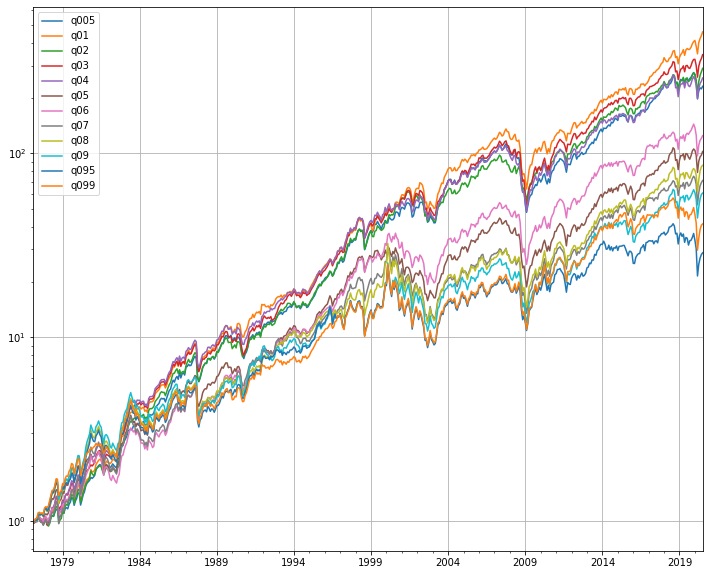

In [12]:
(results['returns']+1).cumprod().plot(logy=True,figsize = (12,10),grid=True)

In [13]:
weights_stats = results['weights_stats'].T
weights_stats.T.style.background_gradient(cmap='Greens',axis=1)

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
HH,0.630107,0.598785,0.587523,0.552854,0.518482,0.576065,0.584794,0.690960,0.753908,0.867400,0.858577,1.000000
Max,0.714969,0.690386,0.685399,0.659350,0.622871,0.687762,0.680422,0.771272,0.817252,0.902622,0.889939,1.000000
Turnover,0.135069,0.181795,0.304298,0.330506,0.349808,0.365430,0.366327,0.245622,0.188042,0.082291,0.089169,0.049808


In [27]:
results['forecasting_errors'].describe();

In [28]:
other_methods = ['ew','gmv']
other_results = get_other_results(dataset,other_methods);

File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!


In [17]:
path_to_results = f"{results_dir}{dataset}/{dataset}_other_results.pickle"
if path.exists(path_to_results):
    other_results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_other_results.pickle")
else:
    other_results = get_other_results(dataset,other_methods)

In [29]:
compare_qs = other_results['returns_stats'].loc[q_criteria].join(
                     q_based.loc[:,['q005','q01','q05','q09']])
compare_risks = other_results['returns_stats'].loc[risk_criteria].join(
                     risk_based.loc[:,['q005','q01','q05','q09']])
compare_rewards = other_results['returns_stats'].loc[reward_criteria].join(
                     reward_based.loc[:,['q005','q01','q05','q09']])

In [30]:
compare_qs.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,ew,gmv,q005,q01,q05,q09
5%,-7.096,-6.066,-6.273,-6.37,-7.709,-9.667
10%,-4.447,-3.893,-4.028,-3.92,-5.289,-7.274
20%,-2.475,-1.958,-1.715,-1.738,-2.782,-3.932
30%,-0.628,-0.509,-0.454,-0.286,-1.018,-1.774
40%,0.656,0.66,0.671,0.679,0.311,0.322
50%,1.595,1.621,1.598,1.713,1.608,1.424
60%,2.569,2.243,2.474,2.567,2.711,2.688
70%,3.727,3.249,3.328,3.511,3.863,4.308
80%,4.601,4.041,4.275,4.562,5.155,6.074
90%,6.566,5.61,6.093,6.335,6.908,8.261


In [31]:
compare_risks

,ew,gmv,q005,q01,q05,q09
std,4.845,4.216,4.403,4.474,5.212,6.522
min,-25.140,-23.603,-20.203,-22.636,-27.977,-32.370
max,14.522,13.123,12.321,15.195,15.208,27.085
vol p.a.,16.783,14.604,15.252,15.498,18.055,22.593
skew,-0.970,-0.941,-1.039,-0.990,-0.951,-0.579
kurt,3.123,3.598,3.061,3.718,2.753,2.155
MDD,-53.814,-50.797,-57.619,-52.907,-57.776,-57.424
CVaR 99%,-11.333,-9.637,-10.664,-10.354,-12.498,-14.559


In [32]:
compare_rewards

,ew,gmv,q005,q01,q05,q09
mean,1.104,1.082,1.148,1.283,1.030,1.008
CAGR,12.461,12.569,13.337,15.127,11.227,9.904
Sharpe,0.531,0.592,0.620,0.714,0.444,0.343


## 17_Industry_Portfolios 

In [33]:
methods = ['q005'] + \
        [f'q0{i}' for i in range(1,10)] + \
        ['q095','q099'] # 'q001'

dataset =  '17_Industry_Portfolios'
#dataset = '25_Portfolios_5x5'
#dataset = '48_Industry_Portfolios'
#dataset =  '100_Portfolios_10x10'


In [34]:
path_to_results = f"{results_dir}{dataset}/{dataset}_results.pickle"
if path.exists(path_to_results):
    results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_results.pickle")
else:
    results = get_results(dataset,methods)

In [35]:
results.keys()

dict_keys(['returns', 'returns_stats', 'weights_stats', 'forecasting_errors'])

In [36]:
q_criteria = ['5%', '10%','20%','30%', '40%', '50%','60%', '70%', '80%', '90%', '95%', '99%']
q_based = results['returns_stats'].loc[q_criteria]

In [37]:
q_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
5%,-5.979,-5.467,-5.12,-6.089,-7.401,-8.823,-9.627,-10.22,-10.4,-10.64,-11.22,-10.89
10%,-3.477,-3.443,-3.394,-3.855,-5.12,-6.839,-6.597,-7.775,-7.895,-7.682,-8.012,-7.547
20%,-1.79,-1.971,-1.78,-1.954,-2.746,-2.795,-3.799,-4.07,-4.133,-4.253,-4.47,-4.328
30%,-0.51,-0.449,-0.711,-0.667,-0.934,-1.334,-1.905,-2.175,-2.287,-2.433,-2.356,-2.489
40%,0.475,0.485,0.454,0.562,0.528,0.095,-0.174,-0.711,-0.591,-1.021,-0.849,-0.67
50%,1.339,1.198,1.221,1.365,1.269,1.201,1.274,1.183,1.087,0.718,0.552,0.495
60%,2.102,2.048,2.203,2.162,2.409,2.649,2.971,2.764,2.705,2.493,2.276,1.928
70%,2.963,3.23,3.018,3.176,3.677,4.237,4.573,4.368,4.299,4.118,3.937,3.601
80%,4.071,4.122,4.154,4.364,5.051,5.427,6.124,6.682,7.189,6.264,6.128,6.01
90%,5.362,5.663,5.537,5.673,7.323,8.099,9.165,9.104,10.11,9.46,9.044,8.876


In [38]:
risk_criteria =  ['std', 'min','max','vol p.a.', 'skew', 'kurt','MDD', 'CVaR 99%']
risk_based = results['returns_stats'].loc[risk_criteria]

In [39]:
risk_based

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,3.963,3.987,3.933,4.270,5.181,6.310,6.890,7.231,7.582,7.457,7.506,7.295
min,-15.883,-21.559,-16.799,-19.161,-26.639,-31.880,-32.774,-31.088,-32.740,-32.910,-32.910,-32.910
max,18.282,12.821,14.489,12.235,18.568,20.246,21.396,21.101,21.920,26.082,26.250,24.570
vol p.a.,13.728,13.810,13.625,14.791,17.946,21.857,23.869,25.049,26.264,25.831,26.003,25.270
skew,-0.547,-0.768,-0.557,-0.832,-0.724,-0.773,-0.750,-0.607,-0.575,-0.445,-0.502,-0.323
kurt,2.119,2.672,1.813,2.326,2.770,3.099,2.819,2.029,1.975,2.240,2.284,2.245
MDD,-37.851,-39.482,-38.511,-48.263,-65.446,-71.142,-70.073,-75.198,-77.580,-76.226,-79.594,-75.137
CVaR 99%,-8.914,-8.733,-8.593,-10.108,-11.458,-14.337,-15.666,-16.713,-17.389,-17.159,-17.865,-16.322


In [40]:
risk_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,3.963,3.987,3.933,4.27,5.181,6.31,6.89,7.231,7.582,7.457,7.506,7.295
min,-15.88,-21.56,-16.8,-19.16,-26.64,-31.88,-32.77,-31.09,-32.74,-32.91,-32.91,-32.91
max,18.28,12.82,14.49,12.23,18.57,20.25,21.4,21.1,21.92,26.08,26.25,24.57
vol p.a.,13.73,13.81,13.62,14.79,17.95,21.86,23.87,25.05,26.26,25.83,26.0,25.27
skew,-0.547,-0.768,-0.557,-0.832,-0.724,-0.773,-0.75,-0.607,-0.575,-0.445,-0.502,-0.323
kurt,2.119,2.672,1.813,2.326,2.77,3.099,2.819,2.029,1.975,2.24,2.284,2.245
MDD,-37.85,-39.48,-38.51,-48.26,-65.45,-71.14,-70.07,-75.2,-77.58,-76.23,-79.59,-75.14
CVaR 99%,-8.914,-8.733,-8.593,-10.11,-11.46,-14.34,-15.67,-16.71,-17.39,-17.16,-17.86,-16.32


In [41]:
reward_criteria =  ['mean','CAGR','Sharpe']
reward_based = results['returns_stats'].loc[reward_criteria]

In [42]:
reward_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
mean,1.021,1.074,1.055,1.019,1.098,1.059,1.067,0.845,0.959,0.708,0.534,0.615
CAGR,11.9,12.6,12.38,11.7,12.16,10.74,10.31,7.12,8.249,5.193,2.956,4.197
Sharpe,0.577,0.62,0.612,0.534,0.492,0.383,0.355,0.232,0.273,0.162,0.08,0.121


<AxesSubplot:>

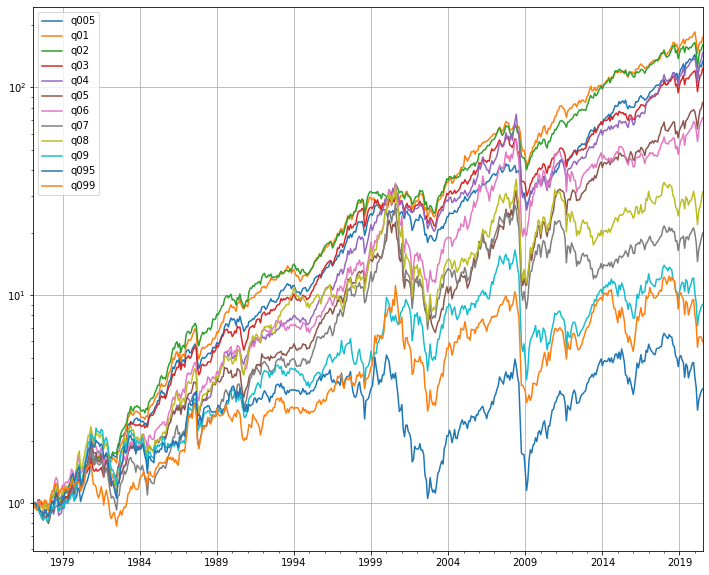

In [43]:
(results['returns']+1).cumprod().plot(logy=True,figsize = (12,10),grid=True)

In [44]:
results['returns'].corr()

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
q005,1.000000,0.897117,0.886843,0.856157,0.780966,0.718031,0.706206,0.691768,0.660096,0.606273,0.637512,0.574129
q01,0.897117,1.000000,0.908019,0.867065,0.791880,0.723936,0.712196,0.699085,0.665109,0.614100,0.639009,0.602548
q02,0.886843,0.908019,1.000000,0.919315,0.832809,0.750365,0.725770,0.716593,0.685746,0.617403,0.650330,0.619790
q03,0.856157,0.867065,0.919315,1.000000,0.890268,0.823829,0.796433,0.776607,0.735748,0.663400,0.691075,0.694843
q04,0.780966,0.791880,0.832809,0.890268,1.000000,0.904873,0.873635,0.838629,0.800538,0.689315,0.703686,0.700627
q05,0.718031,0.723936,0.750365,0.823829,0.904873,1.000000,0.933996,0.888091,0.843936,0.686938,0.716586,0.713457
q06,0.706206,0.712196,0.725770,0.796433,0.873635,0.933996,1.000000,0.936574,0.887325,0.739000,0.735762,0.752367
q07,0.691768,0.699085,0.716593,0.776607,0.838629,0.888091,0.936574,1.000000,0.930489,0.761380,0.751869,0.750414
q08,0.660096,0.665109,0.685746,0.735748,0.800538,0.843936,0.887325,0.930489,1.000000,0.779810,0.761953,0.707656
q09,0.606273,0.614100,0.617403,0.663400,0.689315,0.686938,0.739000,0.761380,0.779810,1.000000,0.879178,0.724700


In [45]:
results['weights_stats'].T

,HH,Max,Turnover
q005,0.362483,0.477305,0.212845
q01,0.316838,0.43934,0.288196
q02,0.307039,0.434449,0.361516
q03,0.291556,0.421657,0.444663
q04,0.371052,0.512468,0.488033
q05,0.485514,0.610599,0.446979
q06,0.550146,0.670099,0.387619
q07,0.611204,0.720314,0.29416
q08,0.75003,0.831384,0.191384
q09,0.796892,0.856929,0.140874


In [46]:
results['forecasting_errors'].describe();

In [47]:
other_methods = ['ew','gmv']
other_results = get_other_results(dataset,other_methods);

File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!


In [48]:
path_to_results = f"{results_dir}{dataset}/{dataset}_other_results.pickle"
if path.exists(path_to_results):
    other_results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_other_results.pickle")
else:
    other_results = get_other_results(dataset,other_methods)

In [49]:
compare_qs = other_results['returns_stats'].loc[q_criteria].join(
                     q_based.loc[:,['q005','q01','q05','q09']])
compare_risks = other_results['returns_stats'].loc[risk_criteria].join(
                     risk_based.loc[:,['q005','q01','q05','q09']])
compare_rewards = other_results['returns_stats'].loc[reward_criteria].join(
                     reward_based.loc[:,['q005','q01','q05','q09']])

In [50]:
compare_qs.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,ew,gmv,q005,q01,q05,q09
5%,-6.352,-4.897,-5.979,-5.467,-8.823,-10.64
10%,-4.066,-2.954,-3.477,-3.443,-6.839,-7.682
20%,-2.112,-1.498,-1.79,-1.971,-2.795,-4.253
30%,-0.83,-0.485,-0.51,-0.449,-1.334,-2.433
40%,0.313,0.573,0.475,0.485,0.095,-1.021
50%,1.339,1.22,1.339,1.198,1.201,0.718
60%,2.388,1.895,2.102,2.048,2.649,2.493
70%,3.159,2.659,2.963,3.23,4.237,4.118
80%,4.309,3.596,4.071,4.122,5.427,6.264
90%,6.202,5.124,5.362,5.663,8.099,9.46


In [51]:
compare_risks

,ew,gmv,q005,q01,q05,q09
std,4.613,3.483,3.963,3.987,6.310,7.457
min,-24.854,-14.960,-15.883,-21.559,-31.880,-32.910
max,14.944,12.690,18.282,12.821,20.246,26.082
vol p.a.,15.980,12.066,13.728,13.810,21.857,25.831
skew,-0.756,-0.576,-0.547,-0.768,-0.773,-0.445
kurt,3.232,1.852,2.119,2.672,3.099,2.240
MDD,-51.617,-34.888,-37.851,-39.482,-71.142,-76.226
CVaR 99%,-10.527,-7.682,-8.914,-8.733,-14.337,-17.159


In [52]:
compare_rewards

,ew,gmv,q005,q01,q05,q09
mean,1.034,0.985,1.021,1.074,1.059,0.708
CAGR,11.698,11.676,11.905,12.596,10.737,5.193
Sharpe,0.505,0.623,0.577,0.620,0.383,0.162


### 25 Portfolios

In [53]:
methods = ['q005'] + \
        [f'q0{i}' for i in range(1,10)] + \
        ['q095','q099'] # 'q001'

dataset = '25_Portfolios_5x5'
#dataset = '48_Industry_Portfolios'
#dataset =  '100_Portfolios_10x10'


In [54]:
path_to_results = f"{results_dir}{dataset}/{dataset}_results.pickle"
if path.exists(path_to_results):
    results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_results.pickle")
else:
    results = get_results(dataset,methods)

In [55]:
q_criteria = ['5%', '10%','20%','30%', '40%', '50%','60%', '70%', '80%', '90%', '95%', '99%']
q_based = results['returns_stats'].loc[q_criteria]

In [56]:
q_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
5%,-6.938,-6.196,-6.297,-6.733,-6.45,-7.89,-8.546,-8.807,-10.13,-9.964,-10.76,-10.2
10%,-3.961,-3.983,-4.478,-4.213,-4.489,-5.564,-5.881,-6.878,-6.987,-8.004,-8.193,-6.498
20%,-1.723,-1.882,-1.85,-2.091,-2.32,-2.791,-3.175,-3.243,-3.511,-4.187,-4.263,-2.979
30%,-0.344,-0.296,-0.412,-0.473,-0.778,-0.964,-1.286,-1.633,-1.474,-1.845,-1.693,-1.194
40%,0.636,0.862,0.718,0.688,0.584,0.305,0.177,0.041,0.086,0.089,0.125,0.118
50%,1.694,1.772,1.732,1.694,1.547,1.533,1.502,1.679,1.589,1.281,1.474,1.218
60%,2.465,2.547,2.669,2.632,2.786,2.659,2.682,2.789,2.571,2.897,2.73,2.766
70%,3.491,3.537,3.549,3.682,3.729,3.835,3.844,4.123,4.033,4.57,4.223,3.89
80%,4.439,4.555,4.465,4.61,4.779,5.161,5.162,5.925,5.715,6.197,6.15,5.546
90%,6.432,6.785,6.537,6.367,6.754,7.221,7.608,8.217,8.21,9.016,8.819,8.239


In [57]:
risk_criteria =  ['std', 'min','max','vol p.a.', 'skew', 'kurt','MDD', 'CVaR 99%']
risk_based = results['returns_stats'].loc[risk_criteria]

In [58]:
risk_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,4.546,4.612,4.742,4.889,4.957,5.386,5.714,6.225,6.523,6.953,7.275,6.928
min,-23.02,-23.44,-23.24,-24.96,-25.35,-25.0,-26.55,-29.93,-29.78,-33.73,-32.73,-34.22
max,14.64,14.49,13.63,17.53,17.3,16.19,18.16,19.59,31.03,28.11,32.45,42.42
vol p.a.,15.75,15.98,16.43,16.94,17.17,18.66,19.8,21.56,22.6,24.09,25.2,24.0
skew,-0.903,-0.906,-1.125,-1.016,-0.962,-0.751,-0.629,-0.62,-0.477,-0.5,-0.467,-0.286
kurt,2.863,3.235,3.4,3.786,3.422,2.05,2.054,2.089,2.394,1.929,2.757,5.422
MDD,-52.67,-52.57,-60.88,-61.16,-52.06,-55.55,-52.65,-60.38,-77.04,-68.85,-71.98,-61.52
CVaR 99%,-10.86,-10.54,-11.35,-11.73,-11.37,-12.51,-13.12,-13.69,-15.07,-15.21,-16.69,-15.91


In [59]:
reward_criteria =  ['mean','CAGR','Sharpe']
reward_based = results['returns_stats'].loc[reward_criteria]

In [60]:
reward_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
mean,1.233,1.362,1.202,1.208,1.194,1.044,0.996,1.078,0.933,0.957,0.831,1.04
CAGR,14.4,16.13,13.85,13.83,13.6,11.3,10.42,11.08,8.941,8.854,6.918,9.977
Sharpe,0.665,0.752,0.615,0.6,0.582,0.439,0.384,0.399,0.304,0.296,0.224,0.34


<AxesSubplot:>

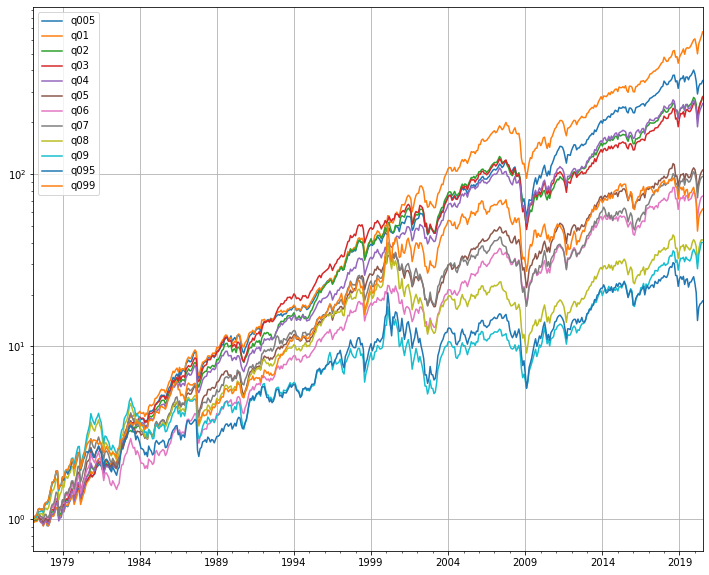

In [61]:
(results['returns']+1).cumprod().plot(logy=True,figsize = (12,10),grid=True)

In [62]:
results['weights_stats'].T

,HH,Max,Turnover
q005,0.41116,0.523418,0.214615
q01,0.431869,0.55138,0.329068
q02,0.410351,0.530915,0.461865
q03,0.357551,0.48733,0.495309
q04,0.324034,0.445242,0.60675
q05,0.355705,0.4864,0.626113
q06,0.402387,0.520568,0.531965
q07,0.500783,0.613891,0.430191
q08,0.563121,0.666844,0.341618
q09,0.72604,0.792774,0.172637


In [63]:
results['forecasting_errors'].describe()

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.090545,0.078023,0.060345,0.047309,0.036290,0.024525,0.010823,-0.003960,-0.021725,-0.054220,-0.093279,-0.168303
std,0.060147,0.059453,0.058509,0.057984,0.057965,0.057907,0.058198,0.058425,0.058635,0.062246,0.074083,0.098011
min,-0.122074,-0.135570,-0.153482,-0.163501,-0.174267,-0.179089,-0.193628,-0.204203,-0.220576,-0.261623,-0.335643,-0.479731
25%,0.053330,0.042249,0.025444,0.013636,0.002359,-0.011751,-0.024069,-0.040363,-0.059361,-0.094254,-0.132726,-0.208213
50%,0.085949,0.073526,0.055651,0.041635,0.032636,0.021039,0.006316,-0.007807,-0.024727,-0.053063,-0.087561,-0.148180
75%,0.124184,0.112356,0.093302,0.078949,0.067698,0.056707,0.045191,0.029821,0.011613,-0.019895,-0.050179,-0.108169
max,0.450776,0.442314,0.419656,0.403601,0.395566,0.384677,0.376339,0.363070,0.340941,0.319869,0.271345,0.159740


In [64]:
other_methods = ['ew','gmv']
other_results = get_other_results(dataset,other_methods);

File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!


In [65]:
path_to_results = f"{results_dir}{dataset}/{dataset}_other_results.pickle"
if path.exists(path_to_results):
    other_results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_other_results.pickle")
else:
    other_results = get_other_results(dataset,other_methods)

In [66]:
compare_qs = other_results['returns_stats'].loc[q_criteria].join(
                     q_based.loc[:,['q005','q01','q05','q09']])
compare_risks = other_results['returns_stats'].loc[risk_criteria].join(
                     risk_based.loc[:,['q005','q01','q05','q09']])
compare_rewards = other_results['returns_stats'].loc[reward_criteria].join(
                     reward_based.loc[:,['q005','q01','q05','q09']])

In [67]:
compare_qs.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,ew,gmv,q005,q01,q05,q09
5%,-7.374,-5.951,-6.938,-6.196,-7.89,-9.964
10%,-4.577,-3.783,-3.961,-3.983,-5.564,-8.004
20%,-2.491,-1.906,-1.723,-1.882,-2.791,-4.187
30%,-0.756,-0.527,-0.344,-0.296,-0.964,-1.845
40%,0.643,0.738,0.636,0.862,0.305,0.089
50%,1.632,1.443,1.694,1.772,1.533,1.281
60%,2.588,2.255,2.465,2.547,2.659,2.897
70%,3.852,3.114,3.491,3.537,3.835,4.57
80%,4.783,4.072,4.439,4.555,5.161,6.197
90%,6.792,5.644,6.432,6.785,7.221,9.016


In [68]:
compare_risks

,ew,gmv,q005,q01,q05,q09
std,5.030,4.156,4.546,4.612,5.386,6.953
min,-26.083,-23.817,-23.015,-23.437,-25.005,-33.729
max,15.327,14.783,14.636,14.493,16.193,28.115
vol p.a.,17.423,14.396,15.749,15.978,18.659,24.085
skew,-0.970,-0.860,-0.903,-0.906,-0.751,-0.500
kurt,3.183,3.539,2.863,3.235,2.050,1.929
MDD,-54.215,-51.791,-52.670,-52.572,-55.555,-68.848
CVaR 99%,-11.768,-9.464,-10.858,-10.545,-12.511,-15.210


In [69]:
compare_rewards

,ew,gmv,q005,q01,q05,q09
mean,1.137,1.069,1.233,1.362,1.044,0.957
CAGR,12.777,12.429,14.404,16.127,11.303,8.854
Sharpe,0.534,0.590,0.665,0.752,0.439,0.296


## 48 Industry Portfolios

In [109]:
methods = ['q005'] + \
        [f'q0{i}' for i in range(1,10)] + \
        ['q095','q099'] # 'q001'

dataset = '48_Industry_Portfolios'
#dataset =  '100_Portfolios_10x10'

In [71]:
results = get_results(dataset,methods)

File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!


In [110]:
path_to_results = f"{results_dir}{dataset}/{dataset}_results.pickle"
if path.exists(path_to_results):
    results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_results.pickle")
else:
    results = get_results(dataset,methods)

In [111]:
q_criteria = ['5%', '10%','20%','30%', '40%', '50%','60%', '70%', '80%', '90%', '95%', '99%']
q_based = results['returns_stats'].loc[q_criteria]

In [112]:
q_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
5%,-5.575,-5.744,-6.02,-6.851,-8.721,-10.07,-10.91,-13.31,-14.01,-15.31,-15.64,-14.52
10%,-3.713,-3.823,-3.941,-4.224,-5.615,-6.964,-7.871,-9.247,-10.66,-10.55,-11.75,-9.738
20%,-1.877,-2.018,-2.155,-2.451,-2.687,-3.131,-4.219,-5.181,-6.16,-6.076,-6.35,-5.666
30%,-0.591,-0.695,-0.601,-1.059,-1.196,-1.344,-2.115,-2.464,-3.053,-3.472,-3.517,-2.685
40%,0.342,0.273,0.664,0.015,0.147,0.068,-0.529,-0.45,-1.122,-1.204,-1.26,-0.882
50%,1.158,1.212,1.365,1.226,1.381,1.491,1.438,1.347,1.008,0.67,0.825,1.01
60%,2.225,2.186,2.274,2.393,2.652,3.028,3.327,3.115,3.198,2.814,2.7,3.258
70%,3.096,3.282,3.274,3.598,3.901,5.079,5.0,5.59,5.92,5.679,5.425,5.135
80%,4.158,4.337,4.428,5.014,5.362,7.038,7.34,8.679,9.432,8.786,8.746,8.496
90%,5.766,5.959,6.0,7.402,7.955,9.997,11.47,12.46,13.85,14.26,14.17,13.25


In [113]:
risk_criteria =  ['std', 'min','max','vol p.a.', 'skew', 'kurt','MDD', 'CVaR 99%']
risk_based = results['returns_stats'].loc[risk_criteria]

In [114]:
risk_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,4.184,4.127,4.356,5.03,5.856,7.464,8.019,9.031,10.04,10.62,11.01,10.26
min,-21.18,-21.89,-21.52,-22.54,-28.36,-31.59,-35.59,-34.08,-37.47,-37.94,-37.94,-37.94
max,14.8,13.6,13.74,16.9,19.97,26.88,27.15,30.3,34.85,40.52,78.68,59.04
vol p.a.,14.49,14.3,15.09,17.42,20.29,25.86,27.78,31.28,34.77,36.8,38.12,35.53
skew,-0.69,-0.615,-0.64,-0.304,-0.485,-0.621,-0.443,-0.283,-0.107,0.116,0.791,0.333
kurt,2.565,2.381,2.122,1.527,2.187,2.775,2.102,1.265,0.961,1.4,5.394,3.089
MDD,-43.46,-39.06,-46.07,-38.69,-60.42,-77.82,-75.56,-82.25,-92.38,-79.22,-89.9,-79.08
CVaR 99%,-9.19,-8.744,-9.497,-10.57,-12.81,-16.67,-17.44,-19.63,-20.8,-21.93,-21.25,-21.48


In [120]:
risk_based.round(2)

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,4.18,4.13,4.36,5.03,5.86,7.46,8.02,9.03,10.04,10.62,11.01,10.26
min,-21.18,-21.89,-21.52,-22.54,-28.36,-31.58,-35.59,-34.08,-37.47,-37.94,-37.94,-37.94
max,14.80,13.60,13.74,16.90,19.97,26.88,27.15,30.30,34.85,40.52,78.68,59.04
vol p.a.,14.50,14.30,15.09,17.42,20.29,25.86,27.78,31.28,34.77,36.80,38.12,35.53
skew,-0.69,-0.62,-0.64,-0.30,-0.48,-0.62,-0.44,-0.28,-0.11,0.12,0.79,0.33
kurt,2.56,2.38,2.12,1.53,2.19,2.78,2.10,1.26,0.96,1.40,5.39,3.09
MDD,-43.46,-39.06,-46.07,-38.69,-60.42,-77.82,-75.56,-82.25,-92.38,-79.22,-89.90,-79.08
CVaR 99%,-9.19,-8.74,-9.50,-10.57,-12.81,-16.67,-17.44,-19.63,-20.80,-21.93,-21.24,-21.48


In [115]:
reward_criteria =  ['mean','CAGR','Sharpe']
reward_based = results['returns_stats'].loc[reward_criteria]

In [116]:
reward_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
mean,1.052,1.042,1.13,1.261,1.191,1.5,1.37,1.397,1.325,1.291,1.152,1.397
CAGR,12.19,12.1,13.14,14.5,12.92,15.56,13.23,12.45,10.24,9.085,7.013,11.04
Sharpe,0.572,0.572,0.612,0.619,0.491,0.528,0.437,0.398,0.333,0.303,0.249,0.349


<AxesSubplot:>

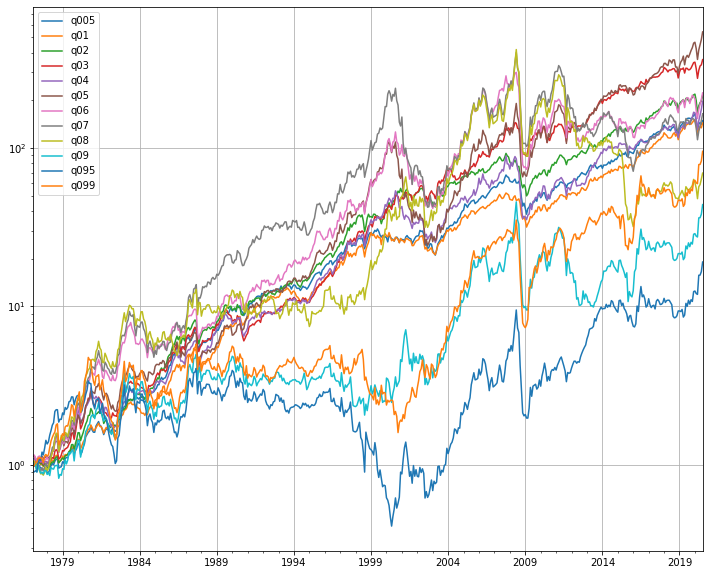

In [117]:
(results['returns']+1).cumprod().plot(logy=True,figsize = (12,10),grid=True)

In [80]:
results['weights_stats'].T

,HH,Max,Turnover
q005,0.208896,0.324281,0.29517
q01,0.224086,0.358032,0.394859
q02,0.24788,0.38035,0.514576
q03,0.224115,0.352559,0.686423
q04,0.2631,0.399796,0.65552
q05,0.384026,0.51914,0.490775
q06,0.505481,0.638151,0.441319
q07,0.646519,0.749612,0.334103
q08,0.806945,0.863134,0.16574
q09,0.879788,0.914398,0.107056


In [81]:
results['forecasting_errors'].describe()

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.143983,0.133467,0.119912,0.108819,0.096444,0.080454,0.062309,0.040141,0.005927,-0.053052,-0.117794,-0.298212
std,0.082556,0.082299,0.081514,0.081616,0.081627,0.081617,0.081833,0.082665,0.084064,0.089143,0.095624,0.190403
min,-0.056766,-0.066767,-0.079465,-0.090627,-0.101684,-0.112403,-0.127063,-0.170100,-0.203000,-0.283000,-0.320400,-0.762000
25%,0.092787,0.082969,0.069960,0.058937,0.048130,0.030320,0.012008,-0.011150,-0.046118,-0.110950,-0.182825,-0.395500
50%,0.127755,0.118349,0.104183,0.091929,0.081733,0.066504,0.050071,0.031474,-0.001440,-0.059041,-0.120050,-0.252000
75%,0.181562,0.170813,0.156301,0.144785,0.132256,0.115870,0.098947,0.078175,0.045640,-0.009349,-0.065676,-0.161925
max,0.806714,0.794490,0.775686,0.764809,0.754906,0.743936,0.734767,0.722948,0.696560,0.673700,0.599400,0.517500


In [82]:
other_methods = ['ew','gmv']
other_results = get_other_results(dataset,other_methods);

File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!


In [83]:
path_to_results = f"{results_dir}{dataset}/{dataset}_other_results.pickle"
if path.exists(path_to_results):
    other_results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_other_results.pickle")
else:
    other_results = get_other_results(dataset,other_methods)

In [84]:
compare_qs = other_results['returns_stats'].loc[q_criteria].join(
                     q_based.loc[:,['q005','q01','q05','q09']])
compare_risks = other_results['returns_stats'].loc[risk_criteria].join(
                     risk_based.loc[:,['q005','q01','q05','q09']])
compare_rewards = other_results['returns_stats'].loc[reward_criteria].join(
                     reward_based.loc[:,['q005','q01','q05','q09']])

<AxesSubplot:>

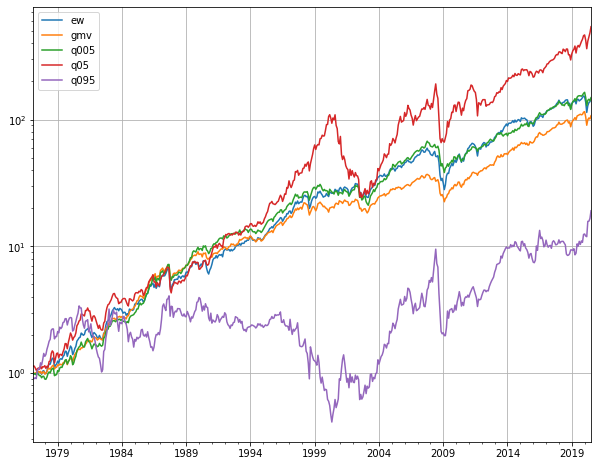

In [85]:
(other_results['returns'].join(results['returns'].loc[:,['q005','q05','q095']])+1).cumprod().plot(logy=True,
                                                                    figsize=(10,8),
                                                                     grid=True)

In [86]:
compare_qs.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,ew,gmv,q005,q01,q05,q09
5%,-6.857,-4.757,-5.575,-5.744,-10.07,-15.31
10%,-4.27,-3.013,-3.713,-3.823,-6.964,-10.55
20%,-2.245,-1.402,-1.877,-2.018,-3.131,-6.076
30%,-0.708,-0.415,-0.591,-0.695,-1.344,-3.472
40%,0.335,0.566,0.342,0.273,0.068,-1.204
50%,1.358,1.17,1.158,1.212,1.491,0.67
60%,2.403,1.815,2.225,2.186,3.028,2.814
70%,3.299,2.509,3.096,3.282,5.079,5.679
80%,4.512,3.467,4.158,4.337,7.038,8.786
90%,6.485,4.996,5.766,5.959,9.997,14.26


In [87]:
compare_risks

,ew,gmv,q005,q01,q05,q09
std,4.718,3.475,4.184,4.127,7.464,10.623
min,-26.010,-16.827,-21.175,-21.886,-31.585,-37.940
max,17.603,13.191,14.804,13.599,26.879,40.520
vol p.a.,16.345,12.037,14.495,14.297,25.858,36.801
skew,-0.807,-0.758,-0.690,-0.615,-0.621,0.116
kurt,3.574,3.138,2.565,2.381,2.775,1.400
MDD,-52.901,-39.279,-43.457,-39.058,-77.820,-79.223
CVaR 99%,-10.743,-7.688,-9.190,-8.744,-16.672,-21.929


In [88]:
compare_rewards

,ew,gmv,q005,q01,q05,q09
mean,1.074,0.961,1.052,1.042,1.500,1.291
CAGR,12.150,11.347,12.189,12.101,15.565,9.085
Sharpe,0.523,0.599,0.572,0.572,0.528,0.303


### 100 Portfolios

In [89]:
methods = ['q005'] + \
        [f'q0{i}' for i in range(1,10)] + \
        ['q095','q099'] # 'q001'

dataset =  '100_Portfolios_10x10'


In [90]:
path_to_results = f"{results_dir}{dataset}/{dataset}_results.pickle"
if path.exists(path_to_results):
    results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_results.pickle")
else:
    results = get_results(dataset,methods)

In [91]:
q_criteria = ['5%', '10%','20%','30%', '40%', '50%','60%', '70%', '80%', '90%', '95%', '99%']
q_based = results['returns_stats'].loc[q_criteria]

In [92]:
q_based.style.background_gradient(cmap='Greens',axis=1).format("{:.3}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
5%,-5.94,-5.83,-6.91,-7.11,-7.63,-8.72,-8.32,-9.92,-11.6,-11.4,-9.54,-10.5
10%,-3.82,-4.15,-4.29,-4.38,-4.89,-6.26,-6.26,-7.21,-7.5,-7.74,-6.92,-6.59
20%,-1.81,-1.96,-2.13,-2.54,-2.46,-3.51,-3.37,-3.63,-4.23,-3.95,-4.05,-3.62
30%,-0.342,-0.521,-0.212,-0.765,-1.11,-1.45,-1.49,-1.64,-1.88,-1.52,-2.18,-1.75
40%,0.649,0.58,0.794,0.594,0.153,0.149,0.179,-0.098,-0.22,0.105,0.044,0.102
50%,1.54,1.47,1.67,1.63,1.33,1.57,1.77,1.57,1.58,1.27,1.24,1.24
60%,2.46,2.34,2.59,2.81,2.65,2.9,2.94,2.9,2.88,2.73,2.8,2.5
70%,3.34,3.47,3.61,3.87,4.12,4.0,4.3,4.32,4.33,4.54,4.13,3.6
80%,4.47,4.67,4.7,5.14,5.32,5.7,6.07,6.29,6.3,6.77,5.92,5.75
90%,5.97,6.35,6.59,7.04,7.45,7.99,8.15,8.83,9.46,9.41,8.73,8.85


In [93]:
risk_criteria =  ['std', 'min','max','vol p.a.', 'skew', 'kurt','MDD', 'CVaR 99%']
risk_based = results['returns_stats'].loc[risk_criteria]

In [94]:
risk_based.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
std,4.355,4.608,4.799,5.136,5.472,6.075,6.479,6.774,7.267,7.654,7.274,7.995
min,-23.12,-23.95,-27.85,-25.33,-26.53,-28.33,-28.67,-28.31,-30.41,-30.39,-27.63,-37.31
max,13.92,15.88,16.92,23.84,19.28,22.57,40.24,24.29,31.07,37.85,47.94,43.18
vol p.a.,15.09,15.96,16.62,17.79,18.96,21.04,22.44,23.47,25.17,26.52,25.2,27.7
skew,-1.153,-0.918,-1.0,-0.68,-0.6,-0.562,0.033,-0.477,-0.383,-0.03,0.362,0.057
kurt,3.971,3.446,3.904,3.015,2.652,2.269,4.891,1.91,1.735,2.577,4.894,6.877
MDD,-53.11,-55.79,-51.12,-53.83,-43.46,-60.54,-57.7,-64.02,-67.09,-66.26,-67.45,-84.0
CVaR 99%,-10.21,-10.53,-11.11,-11.64,-12.17,-13.68,-13.3,-15.42,-16.29,-16.63,-15.51,-18.83


In [95]:
reward_criteria =  ['mean','CAGR','Sharpe']
reward_based = results['returns_stats'].loc[reward_criteria]

In [96]:
reward_based.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
mean,1.157,1.183,1.26,1.309,1.229,1.053,1.315,1.108,1.011,1.218,1.099,0.982
CAGR,13.49,13.68,14.6,15.05,13.72,10.88,14.1,11.01,9.283,11.68,10.53,8.184
Sharpe,0.634,0.618,0.649,0.639,0.549,0.394,0.51,0.382,0.31,0.387,0.351,0.269


<AxesSubplot:>

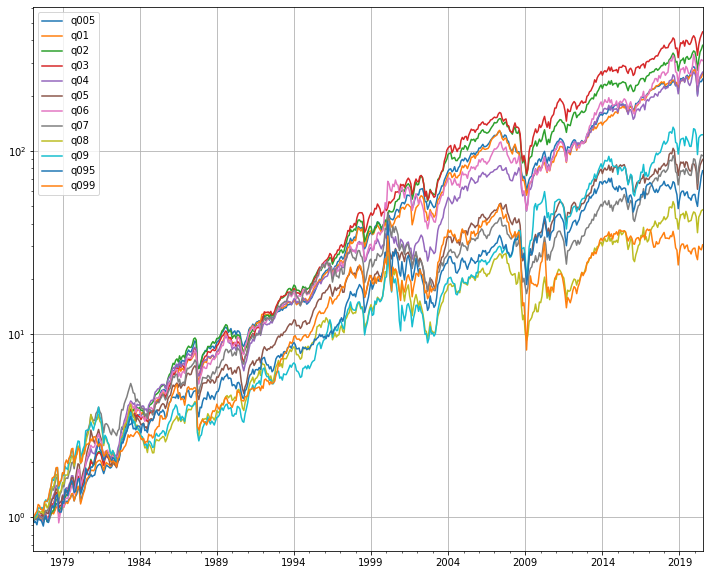

In [97]:
(results['returns']+1).cumprod().plot(logy=True,figsize = (12,10),grid=True)

In [98]:
results['weights_stats'].T

,HH,Max,Turnover
q005,0.276887,0.3908,0.297794
q01,0.276912,0.408029,0.401881
q02,0.22305,0.350322,0.606413
q03,0.209591,0.335826,0.699669
q04,0.242336,0.374874,0.798977
q05,0.27801,0.405684,0.651121
q06,0.326062,0.463579,0.56934
q07,0.40537,0.536565,0.457099
q08,0.513866,0.627031,0.356169
q09,0.618301,0.71952,0.262508


In [99]:
results['forecasting_errors'].describe()

,q005,q01,q02,q03,q04,q05,q06,q07,q08,q09,q095,q099
count,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000,522.000000
mean,0.122588,0.110461,0.094138,0.081251,0.069782,0.056394,0.042036,0.025126,0.002979,-0.039139,-0.100213,-0.227547
std,0.080047,0.079142,0.078378,0.078255,0.078339,0.078622,0.078773,0.078842,0.079993,0.084040,0.099634,0.137868
min,-0.091419,-0.106655,-0.121573,-0.130409,-0.137822,-0.148324,-0.163973,-0.174711,-0.193515,-0.251491,-0.387762,-0.570134
25%,0.074869,0.064792,0.050259,0.037564,0.025954,0.010729,-0.003031,-0.021034,-0.042911,-0.088689,-0.154500,-0.325561
50%,0.110958,0.099101,0.082716,0.069870,0.057585,0.043708,0.029301,0.012599,-0.007743,-0.047642,-0.098697,-0.201192
75%,0.157259,0.141269,0.124394,0.111807,0.099391,0.085462,0.071267,0.054914,0.033147,-0.001645,-0.045028,-0.134440
max,0.688596,0.669935,0.649077,0.638970,0.631490,0.623386,0.611020,0.589336,0.571327,0.532686,0.487041,0.313524


In [100]:
other_methods = ['ew','gmv']
other_results = get_other_results(dataset,other_methods);

File already exists. Overwriting!
File already exists. Overwriting!
File already exists. Overwriting!


In [101]:
path_to_results = f"{results_dir}{dataset}/{dataset}_other_results.pickle"
if path.exists(path_to_results):
    other_results = pd.read_pickle(f"{results_dir}{dataset}/{dataset}_other_results.pickle")
else:
    other_results = get_other_results(dataset,other_methods)

In [102]:
other_results['returns']

,ew,gmv
1977-02-01,-0.014339,-0.016391
1977-03-01,0.003620,-0.013184
1977-04-01,0.017925,0.017554
1977-05-01,-0.004065,-0.010597
1977-06-01,0.059812,0.037874
...,...,...
2020-03-01,-0.216994,-0.185188
2020-04-01,0.161169,0.140971
2020-05-01,0.062178,0.045321
2020-06-01,0.029700,0.002569


In [103]:
compare_qs = other_results['returns_stats'].loc[q_criteria].join(
                     q_based.loc[:,['q005','q01','q05','q09']])
compare_risks = other_results['returns_stats'].loc[risk_criteria].join(
                     risk_based.loc[:,['q005','q01','q05','q09']])
compare_rewards = other_results['returns_stats'].loc[reward_criteria].join(
                     reward_based.loc[:,['q005','q01','q05','q09']])

<AxesSubplot:>

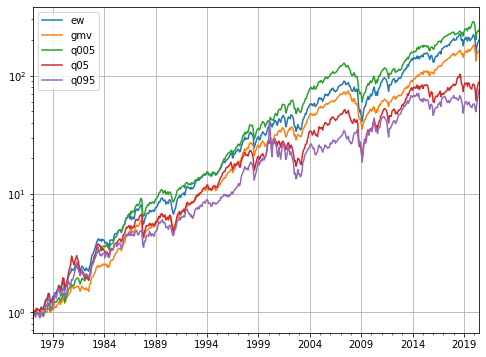

In [104]:
(other_results['returns'].join(results['returns'].loc[:,['q005','q05','q095']])+1).cumprod().plot(logy=True,
                                                                    figsize=(8,6),
                                                                     grid=True)

In [105]:
compare_qs.style.background_gradient(cmap='Blues',axis=1).format("{:.4}")

,ew,gmv,q005,q01,q05,q09
5%,-7.515,-5.818,-5.94,-5.831,-8.718,-11.43
10%,-4.822,-3.606,-3.816,-4.154,-6.262,-7.738
20%,-2.562,-1.715,-1.814,-1.957,-3.506,-3.948
30%,-0.795,-0.348,-0.342,-0.521,-1.445,-1.521
40%,0.6,0.756,0.649,0.58,0.149,0.105
50%,1.672,1.429,1.539,1.474,1.571,1.271
60%,2.628,2.286,2.464,2.344,2.899,2.732
70%,3.917,2.976,3.337,3.47,4.005,4.542
80%,4.834,3.921,4.467,4.667,5.697,6.769
90%,7.01,5.569,5.972,6.349,7.991,9.411


In [106]:
compare_risks

,ew,gmv,q005,q01,q05,q09
std,5.109,4.108,4.355,4.608,6.075,7.654
min,-26.390,-23.944,-23.117,-23.953,-28.329,-30.389
max,16.117,14.097,13.921,15.882,22.569,37.854
vol p.a.,17.697,14.230,15.086,15.963,21.044,26.515
skew,-0.948,-1.047,-1.153,-0.918,-0.562,-0.030
kurt,3.165,4.400,3.971,3.446,2.269,2.577
MDD,-54.651,-52.579,-53.107,-55.788,-60.542,-66.261
CVaR 99%,-11.891,-9.388,-10.211,-10.527,-13.676,-16.628


In [121]:
compare_rewards.style.background_gradient(cmap='Greens',axis=1).format("{:.4}")

,ew,gmv,q005,q01,q05,q09
mean,1.157,1.071,1.157,1.183,1.053,1.218
CAGR,12.99,12.48,13.49,13.68,10.88,11.68
Sharpe,0.539,0.598,0.634,0.618,0.394,0.387


## CRSPd 30 stocks
* plotting weights makes no sense with changing universe 
* turnover also does not makes sense because of changing universe

In [86]:
results_dir = '../data/results/'

dataset = 'CRSPd_restricted30'
strategies = ['ew','gmv','q005','q095']

In [87]:
performance, initial_weights, all_weights = extract_results(results_dir, strategies, dataset)

In [88]:
portfolio_describe(performance,tau=[0.01,0.05,0.95,0.99])

,ew,gmv,q005,q095
mean,0.042,0.042,0.046,0.060
std,1.092,0.838,0.892,2.754
min,-18.597,-14.143,-15.353,-27.641
25%,-0.493,-0.386,-0.418,-1.213
50%,0.052,0.050,0.048,0.000
75%,0.578,0.478,0.514,1.337
max,10.241,9.536,8.598,48.173
1%,-2.844,-2.227,-2.353,-7.148
5%,-1.643,-1.218,-1.318,-3.859
95%,1.693,1.336,1.407,3.983


In [96]:
get_weights_stats(all_weights, initial_weights,no_turnover=True)

,ew,gmv,q005,q095
HH,0.03,0.15,0.18,0.91
Max,0.03,0.26,0.30,0.94
Turnover,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

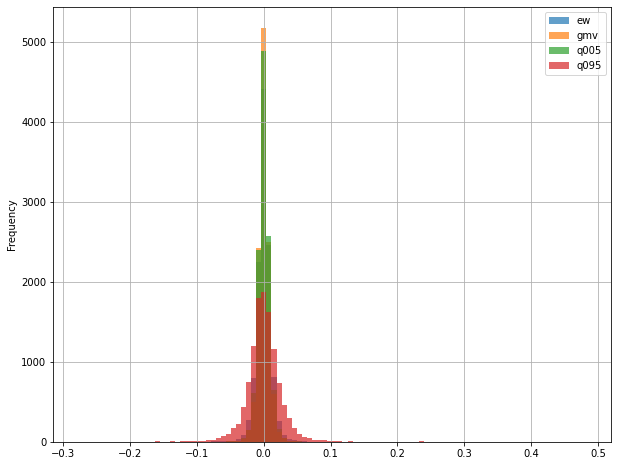

In [97]:
performance[['ew','gmv','q005','q095']].plot.hist(bins=100,alpha=0.7,grid=True,figsize=(10,8))

<AxesSubplot:>

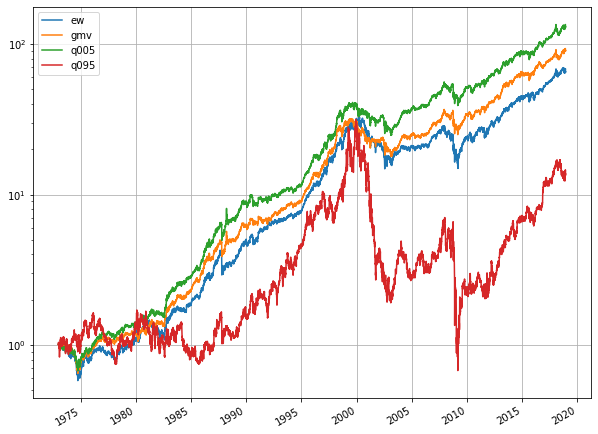

In [98]:
(performance+1).cumprod().plot(logy=True, grid=True, figsize=(10,8))

### CRSPd 50 stocks
* plotting weights makes no sense with changing universe 
* turnover also does not makes sense because of changing universe

In [101]:
results_dir = '../data/results/'

dataset = 'CRSPd_restricted50'
strategies = ['ew','gmv','q005','q095']

In [102]:
performance, initial_weights, all_weights = extract_results(results_dir, strategies, dataset)

In [103]:
portfolio_describe(performance,tau=[0.01,0.05,0.95,0.99])

,ew,gmv,q005,q095
mean,0.044,0.043,0.046,0.041
std,1.089,0.803,0.855,2.940
min,-19.271,-14.987,-12.527,-27.641
25%,-0.484,-0.366,-0.387,-1.359
50%,0.053,0.048,0.051,0.000
75%,0.586,0.459,0.503,1.412
max,10.249,9.220,9.352,48.173
1%,-2.843,-2.095,-2.246,-7.588
5%,-1.658,-1.160,-1.264,-4.152
95%,1.697,1.266,1.340,4.318


In [104]:
get_weights_stats(all_weights, initial_weights,no_turnover=True)

,ew,gmv,q005,q095
HH,0.02,0.12,0.15,0.91
Max,0.02,0.21,0.26,0.94
Turnover,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='Frequency'>

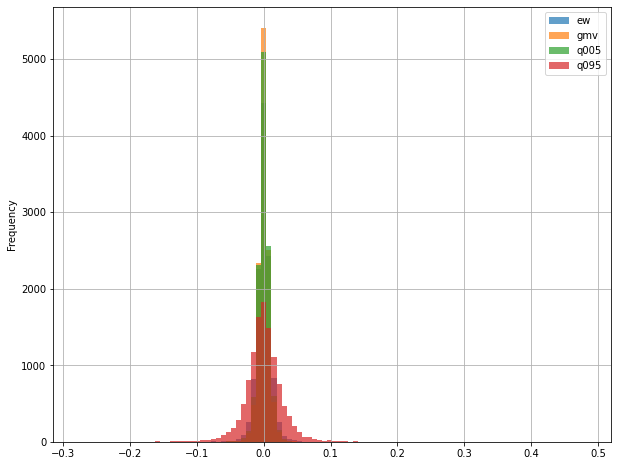

In [105]:
performance[['ew','gmv','q005','q095']].plot.hist(bins=100,alpha=0.7,grid=True,figsize=(10,8))

<AxesSubplot:>

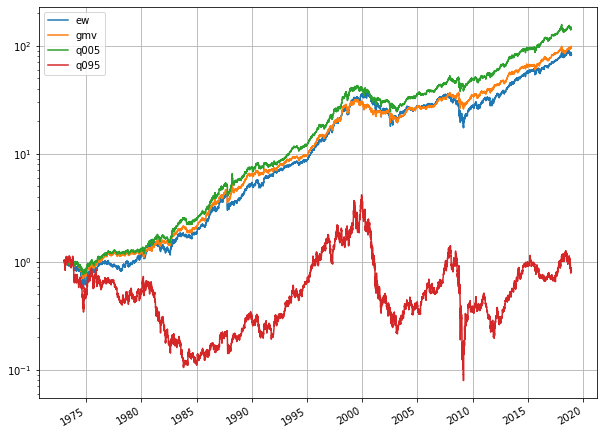

In [106]:
(performance+1).cumprod().plot(logy=True, grid=True, figsize=(10,8))